# Pandas DataFrames

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Datenaufbereitung

In [20]:
df = pd.read_csv('staatsausgaben.csv')
df['Jahr'] = df['Jahr'].astype(int)
df = df.set_index('Jahr')

In [21]:
df = df.pivot(columns='Kennzahl', values='CHF')
df = df.sort_index()
df.columns.name = None

In [22]:
df.head()

,Bildung und Forschung,Finanzen und Steuern,Sicherheit,Soziale Wohlfahrt,Verkehr
Jahr,,,,,
1990,2.915631e+09,4.284407e+09,6.232319e+09,6.875148e+09,4.626737e+09
1991,3.196256e+09,4.556436e+09,6.403684e+09,8.091567e+09,5.372566e+09
1992,3.463842e+09,5.520356e+09,6.469725e+09,8.615627e+09,5.541553e+09
1993,3.588631e+09,5.211826e+09,5.989260e+09,1.129834e+10,6.127085e+09
1994,3.708234e+09,6.271460e+09,6.180145e+09,1.069757e+10,6.044093e+09


## Datenvisualisierung

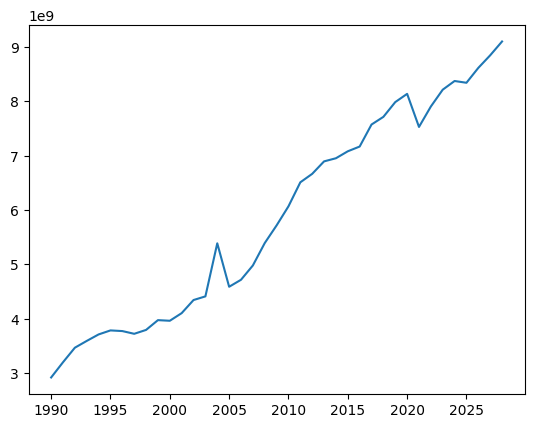

In [23]:
plt.figure()
plt.plot(df.index, df['Bildung und Forschung'])
plt.show()

<Figure size 640x480 with 0 Axes>

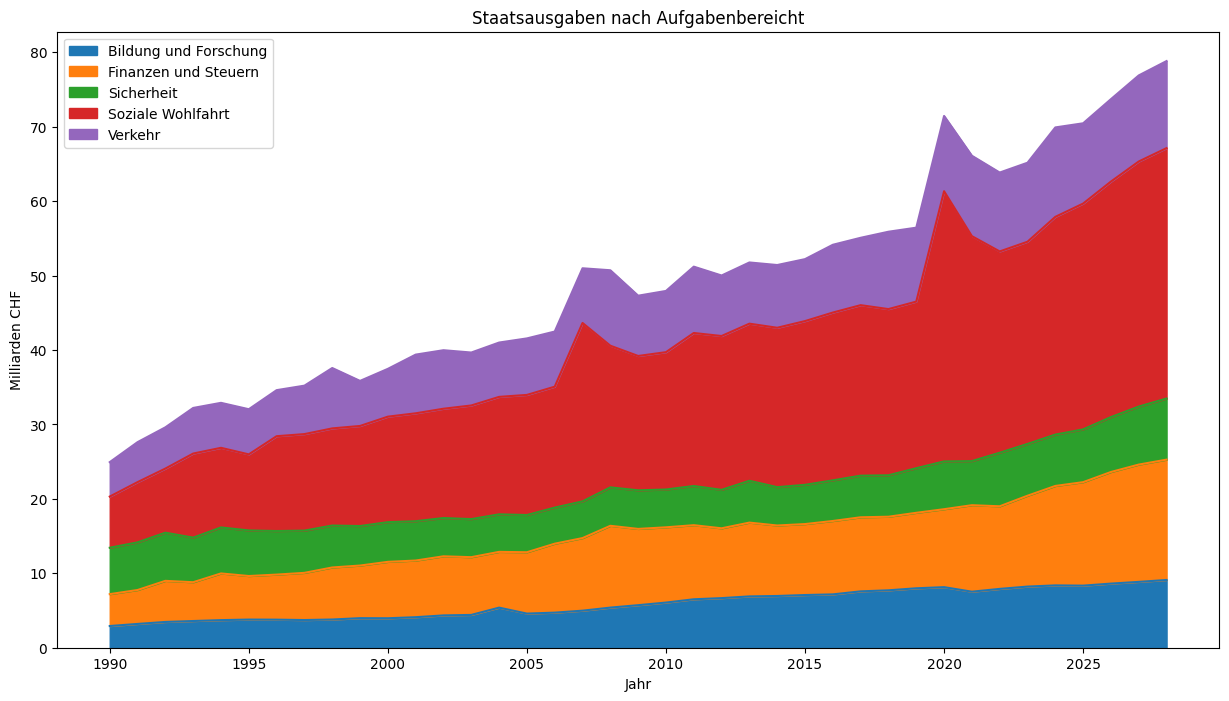

In [31]:
plt.figure()
df.plot.area(stacked=True, figsize=(15, 8))

# Alternativ könnten auch die Daten in Mia umgerechnet werden
def billions_formatter(x, p):
    return f'{x/1e9:.0f}'  # Keine Dezimalstellen

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(billions_formatter))

plt.ylabel('Milliarden CHF')
plt.title('Staatsausgaben nach Aufgabenbereicht')
plt.show()


In [32]:
df_relativ = df.div(df.sum(axis=1), axis=0) * 100

<Axes: xlabel='Jahr'>

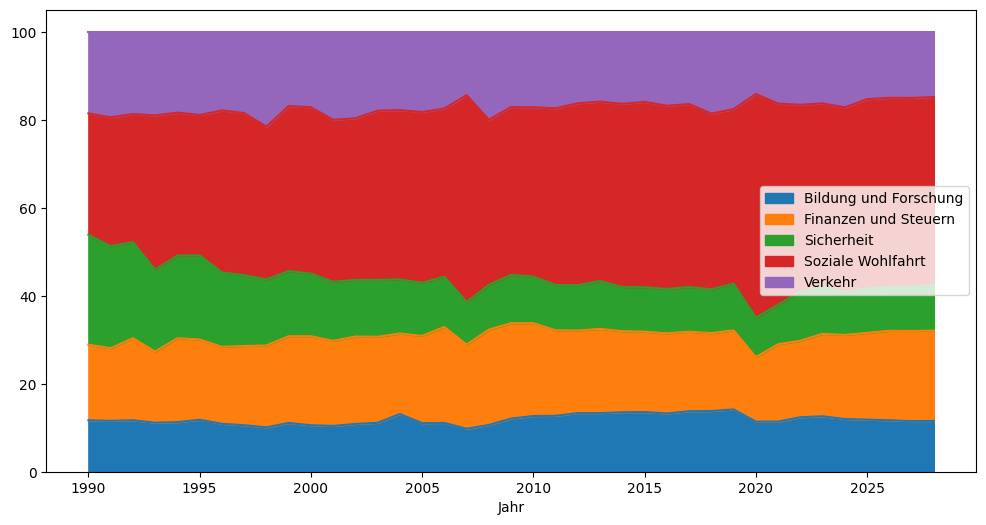

In [33]:
df_relativ.plot.area(stacked=True, figsize=(12, 6))